<a href="https://colab.research.google.com/github/Rifana20/Shopping-EDA/blob/main/shoppingEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
data=pd.read_csv('shopping_trends_updated.csv')

In [6]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
data.shape

(3900, 18)

In [12]:
data.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [13]:
data.duplicated().sum()

np.int64(0)

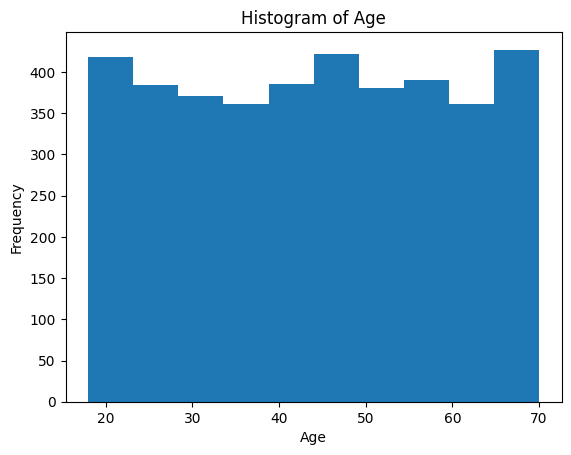

In [16]:
data['Age'].plot(kind="hist")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [17]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

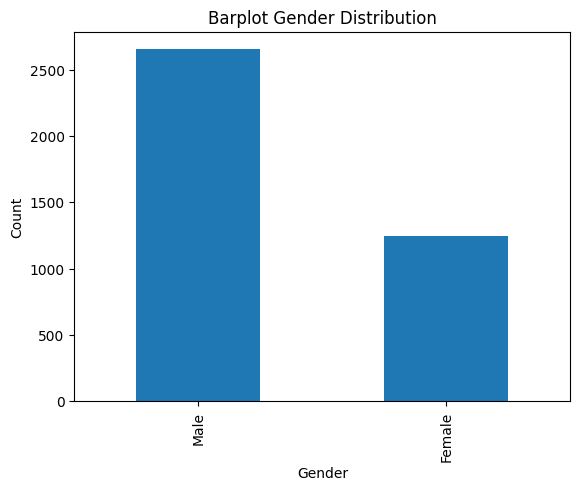

In [18]:
data["Gender"].value_counts().plot(kind="bar")
plt.title("Barplot Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [19]:
data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False).head(2)


,Purchase Amount (USD)
Category,
Footwear,60.255426
Clothing,60.025331


In [21]:
data.sort_values(by="Review Rating", ascending=False,inplace=True)


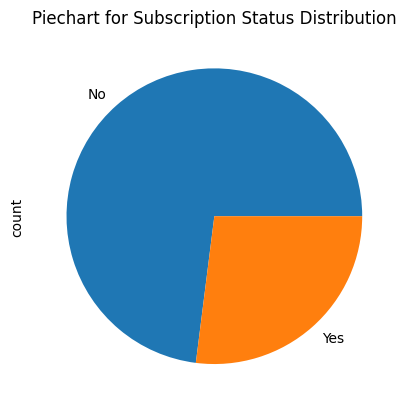

In [22]:
data['Subscription Status'].value_counts().plot(kind='pie')
plt.title('Piechart for Subscription Status Distribution')
plt.show()

<Axes: ylabel='count'>

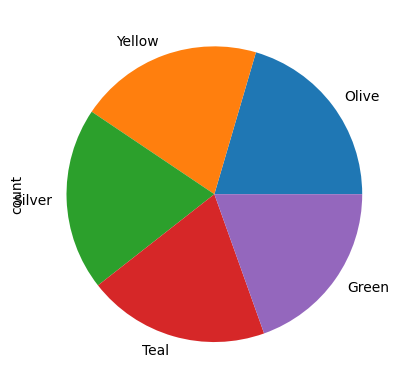

In [26]:
data['Color'].value_counts().head().plot(kind='pie')


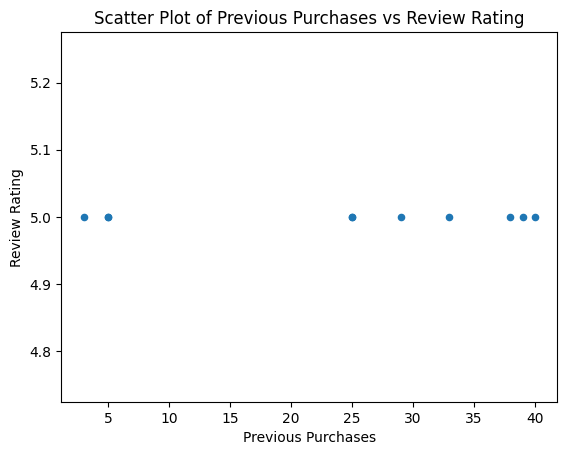

In [28]:
data.head(10).plot(x="Previous Purchases", y="Review Rating", kind="scatter")
plt.title("Scatter Plot of Previous Purchases vs Review Rating")
plt.xlabel("Previous Purchases")
plt.ylabel("Review Rating")
plt.show()

In [30]:
data.groupby("Season")["Purchase Amount (USD)"].sum()

,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Summer,55777
Winter,58607


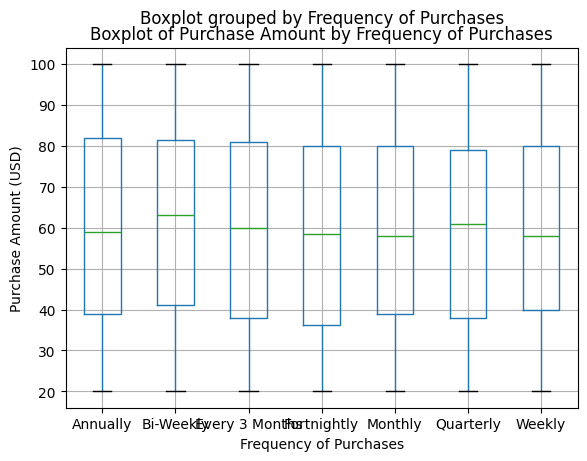

In [31]:
data.boxplot(column="Purchase Amount (USD)",by="Frequency of Purchases")
plt.title("Boxplot of Purchase Amount by Frequency of Purchases")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.show()

In [35]:
data["Payment Method"].value_counts().sort_values(ascending=False).head(1)

,count
Payment Method,
PayPal,677


In [36]:
pd.pivot_table(data,values="Purchase Amount (USD)",index="Location",columns="Item Purchased",aggfunc="mean").head()

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [38]:
data.groupby("Size")["Purchase Amount (USD)"].mean()

,Purchase Amount (USD)
Size,
L,58.563153
M,59.924217
S,61.037707
XL,60.090909


In [39]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum()

,Purchase Amount (USD)
Payment Method,
Bank Transfer,36544
Cash,40002
Credit Card,40310
Debit Card,38742
PayPal,40109
Venmo,37374


In [41]:
data.groupby("Discount Applied")['Review Rating'].mean()

,Review Rating
Discount Applied,
No,3.757715
Yes,3.739654


In [42]:
data.groupby('Color')['Category'].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [43]:
data.groupby('Frequency of Purchases')['Previous Purchases'].median()

,Previous Purchases
Frequency of Purchases,
Annually,24.0
Bi-Weekly,24.0
Every 3 Months,24.0
Fortnightly,26.0
Monthly,25.0
Quarterly,28.0
Weekly,26.0


In [44]:
data.groupby('Season')['Review Rating'].mean()

,Review Rating
Season,
Fall,3.729949
Spring,3.790591
Summer,3.725654
Winter,3.752111


<Axes: xlabel='Season'>

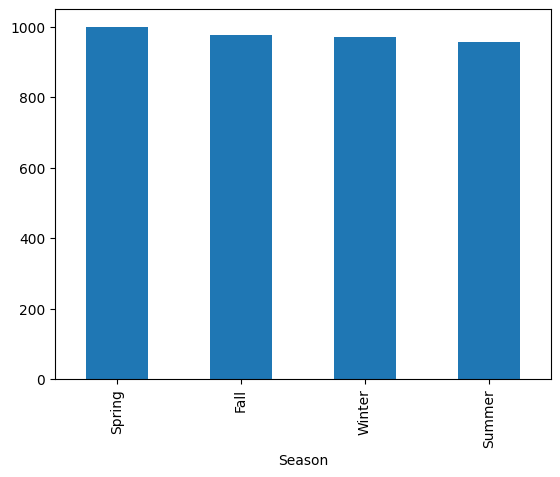

In [45]:
data['Season'].value_counts().plot(kind='bar')


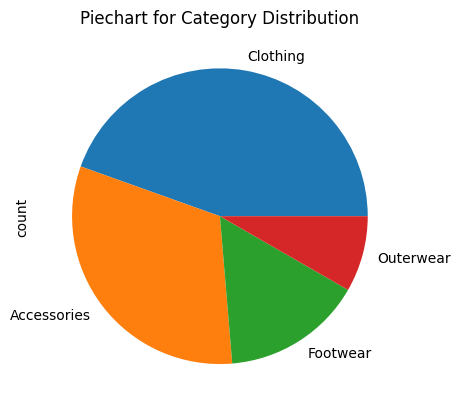

In [46]:
data['Category'].value_counts().plot(kind='pie')
plt.title('Piechart for Category Distribution')
plt.show()

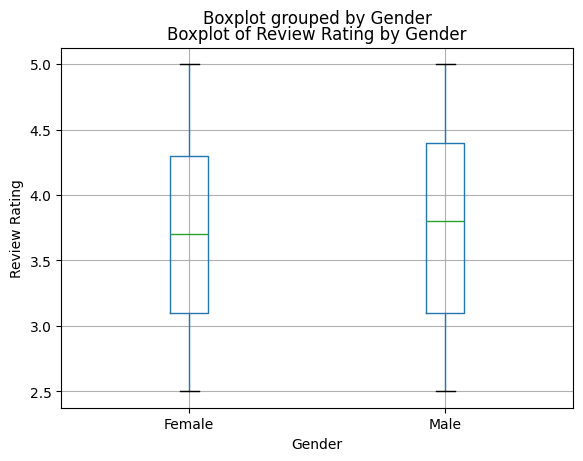

In [47]:
data.boxplot(column='Review Rating',by='Gender')
plt.title('Boxplot of Review Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.show()

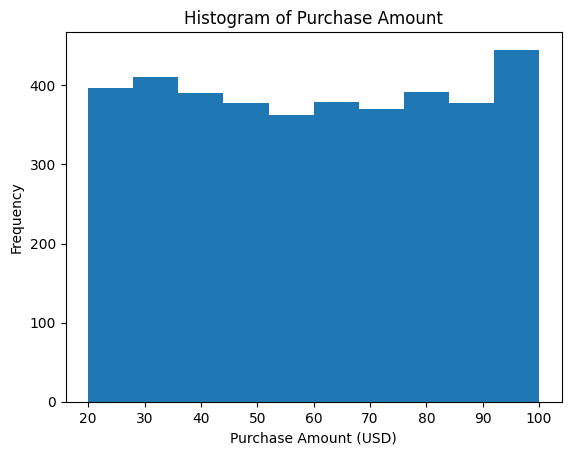

In [48]:
data['Purchase Amount (USD)'].plot(kind='hist',bins=10)
plt.title('Histogram of Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

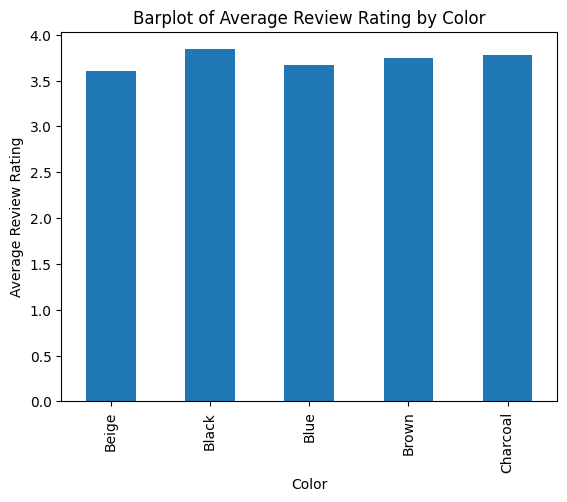

In [50]:
data.groupby('Color')['Review Rating'].mean().head(5).plot(kind='bar')
plt.title('Barplot of Average Review Rating by Color')
plt.xlabel('Color')
plt.ylabel('Average Review Rating')
plt.show()

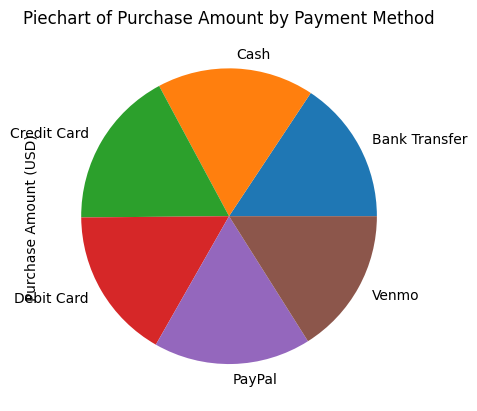

In [51]:
data.groupby('Payment Method')['Purchase Amount (USD)'].sum().plot(kind='pie')
plt.title('Piechart of Purchase Amount by Payment Method')
plt.show()

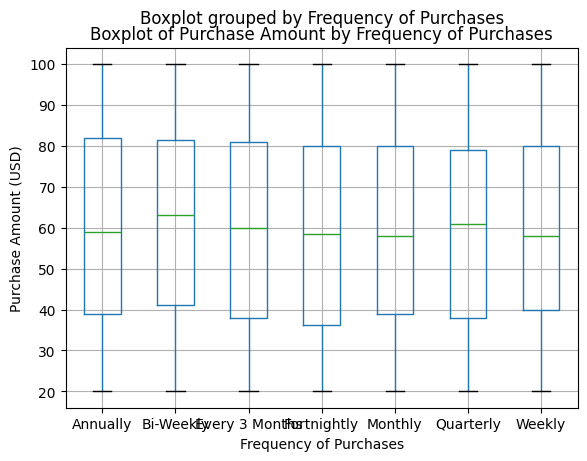

In [52]:
data.boxplot(column='Purchase Amount (USD)',by='Frequency of Purchases')
plt.title('Boxplot of Purchase Amount by Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

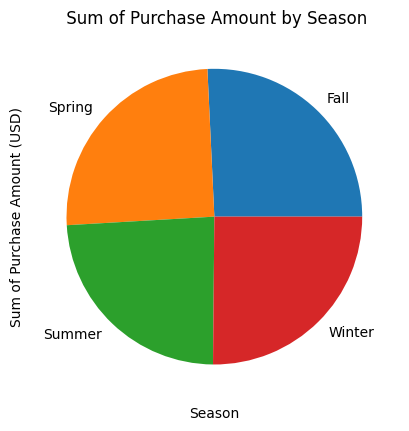

In [54]:
data.groupby('Season')['Purchase Amount (USD)'].sum().plot(kind='pie')
plt.title(' Sum of Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Sum of Purchase Amount (USD)')
plt.show()